# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1200,n_features=8,centers=7,cluster_std=8,random_state=0)

In [5]:
# YOUR CODE HERE
print(X.shape,y.shape)

(1200, 8) (1200,)


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

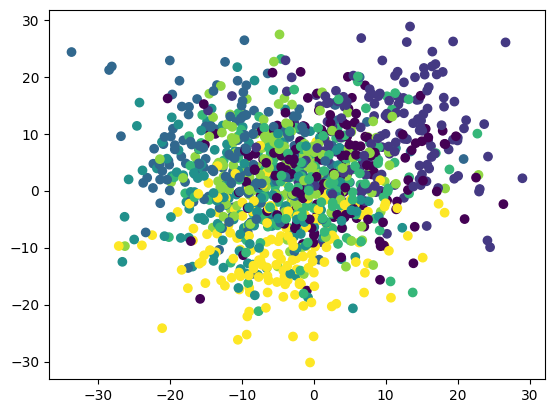

In [10]:
plt.scatter(X[:,0],X[:,5],c=y)

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

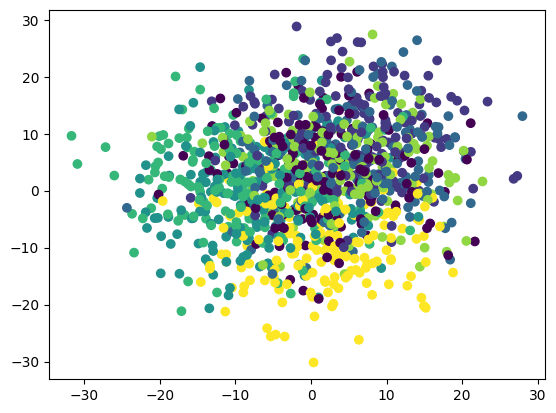

In [11]:
# YOUR CODE HERE
plt.scatter(X[:,2],X[:,5],c=y)

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [14]:
from tensorflow.keras import utils

In [12]:
# YOUR CODE HERE
y

array([3, 4, 3, ..., 4, 2, 4])

In [16]:
y_cat=utils.to_categorical(y)

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
# YOUR CODE HERE
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.3,random_state=0)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [24]:
# YOUR CODE HERE
scaler = StandardScaler()
scaler=scaler.fit(X_train)

In [26]:
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [28]:
input_dim=X_train_s.shape[1]

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = Sequential()
    
    #add firt layer
    model.add(Dense(50,activation='relu',input_dim=input_dim))
    
    #add last layer
    model.add(Dense(7,activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                450       
                                                                 
 dense_9 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓  How many parameters (a.k.a. weights) are there in the model ❓

In [49]:
# YOUR CODE HERE
807

807

❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [42]:
# YOUR CODE HERE
model = initialize_model()
history = model.fit(X_train_s,y_train,epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 388us/step - loss: 1.8843 - accuracy: 0.1917
Epoch 2/50
27/27 [==============================] - 0s 534us/step - loss: 1.6540 - accuracy: 0.3869
Epoch 3/50
27/27 [==============================] - 0s 420us/step - loss: 1.4761 - accuracy: 0.5226
Epoch 4/50
27/27 [==============================] - 0s 431us/step - loss: 1.3341 - accuracy: 0.5857
Epoch 5/50
27/27 [==============================] - 0s 568us/step - loss: 1.2203 - accuracy: 0.6107
Epoch 6/50
27/27 [==============================] - 0s 439us/step - loss: 1.1300 - accuracy: 0.6381
Epoch 7/50
27/27 [==============================] - 0s 570us/step - loss: 1.0596 - accuracy: 0.6655
Epoch 8/50
27/27 [==============================] - 0s 433us/step - loss: 1.0043 - accuracy: 0.6738
Epoch 9/50
27/27 [==============================] - 0s 547us/step - loss: 0.9596 - accuracy: 0.6833
Epoch 10/50
27/27 [==============================] - 0s 412us/step - loss: 0.9258 - accuracy: 0.6964

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [48]:
# YOUR CODE HERE
np.mean(history.__dict__['history']['accuracy'])

0.6893095195293426

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [53]:
accuracy_baseline = 1/y_cat.shape[1]
accuracy_baseline

0.14285714285714285

🧪 **Test your code**

In [54]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gasparburgi/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gasparburgi/code/GasparinB/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-multiclass-classification/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



In [55]:
!git add tests/baseline.pickle

!git commit -m 'Completed baseline step'

!git push origin master

[master ded648d] Completed baseline step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/baseline.pickle
Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 8 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (13/13), 5.60 KiB | 2.80 MiB/s, done.
Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
To github.com:GasparinB/data-multiclass-classification.git
 * [new branch]      master -> master


❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [61]:
# YOUR CODE HERE
model = initialize_model()
history = model.fit(X_train_s,y_train,epochs=1000)

Epoch 1/1000
27/27 [==============================] - 0s 409us/step - loss: 1.9326 - accuracy: 0.1679
Epoch 2/1000
27/27 [==============================] - 0s 467us/step - loss: 1.7011 - accuracy: 0.3619
Epoch 3/1000
27/27 [==============================] - 0s 396us/step - loss: 1.5166 - accuracy: 0.5214
Epoch 4/1000
27/27 [==============================] - 0s 414us/step - loss: 1.3649 - accuracy: 0.6131
Epoch 5/1000
27/27 [==============================] - 0s 434us/step - loss: 1.2429 - accuracy: 0.6476
Epoch 6/1000
27/27 [==============================] - 0s 405us/step - loss: 1.1447 - accuracy: 0.6583
Epoch 7/1000
27/27 [==============================] - 0s 401us/step - loss: 1.0663 - accuracy: 0.6714
Epoch 8/1000
27/27 [==============================] - 0s 394us/step - loss: 1.0056 - accuracy: 0.6833
Epoch 9/1000
27/27 [==============================] - 0s 425us/step - loss: 0.9588 - accuracy: 0.6845
Epoch 10/1000
27/27 [==============================] - 0s 411us/step - loss: 0.922

27/27 [==============================] - 0s 413us/step - loss: 0.6806 - accuracy: 0.7357
Epoch 81/1000
27/27 [==============================] - 0s 417us/step - loss: 0.6810 - accuracy: 0.7393
Epoch 82/1000
27/27 [==============================] - 0s 433us/step - loss: 0.6793 - accuracy: 0.7405
Epoch 83/1000
27/27 [==============================] - 0s 419us/step - loss: 0.6761 - accuracy: 0.7452
Epoch 84/1000
27/27 [==============================] - 0s 400us/step - loss: 0.6765 - accuracy: 0.7440
Epoch 85/1000
27/27 [==============================] - 0s 391us/step - loss: 0.6749 - accuracy: 0.7345
Epoch 86/1000
27/27 [==============================] - 0s 393us/step - loss: 0.6738 - accuracy: 0.7393
Epoch 87/1000
27/27 [==============================] - 0s 435us/step - loss: 0.6731 - accuracy: 0.7393
Epoch 88/1000
27/27 [==============================] - 0s 404us/step - loss: 0.6716 - accuracy: 0.7440
Epoch 89/1000
27/27 [==============================] - 0s 390us/step - loss: 0.6712 - a

27/27 [==============================] - 0s 401us/step - loss: 0.6075 - accuracy: 0.7583
Epoch 160/1000
27/27 [==============================] - 0s 403us/step - loss: 0.6077 - accuracy: 0.7595
Epoch 161/1000
27/27 [==============================] - 0s 397us/step - loss: 0.6069 - accuracy: 0.7631
Epoch 162/1000
27/27 [==============================] - 0s 396us/step - loss: 0.6066 - accuracy: 0.7643
Epoch 163/1000
27/27 [==============================] - 0s 409us/step - loss: 0.6050 - accuracy: 0.7595
Epoch 164/1000
27/27 [==============================] - 0s 393us/step - loss: 0.6045 - accuracy: 0.7667
Epoch 165/1000
27/27 [==============================] - 0s 380us/step - loss: 0.6032 - accuracy: 0.7631
Epoch 166/1000
27/27 [==============================] - 0s 387us/step - loss: 0.6028 - accuracy: 0.7619
Epoch 167/1000
27/27 [==============================] - 0s 401us/step - loss: 0.6021 - accuracy: 0.7595
Epoch 168/1000
27/27 [==============================] - 0s 378us/step - loss: 0

27/27 [==============================] - 0s 410us/step - loss: 0.5615 - accuracy: 0.7857
Epoch 238/1000
27/27 [==============================] - 0s 396us/step - loss: 0.5603 - accuracy: 0.7833
Epoch 239/1000
27/27 [==============================] - 0s 396us/step - loss: 0.5610 - accuracy: 0.7833
Epoch 240/1000
27/27 [==============================] - 0s 391us/step - loss: 0.5606 - accuracy: 0.7833
Epoch 241/1000
27/27 [==============================] - 0s 401us/step - loss: 0.5606 - accuracy: 0.7774
Epoch 242/1000
27/27 [==============================] - 0s 402us/step - loss: 0.5597 - accuracy: 0.7869
Epoch 243/1000
27/27 [==============================] - 0s 386us/step - loss: 0.5582 - accuracy: 0.7869
Epoch 244/1000
27/27 [==============================] - 0s 393us/step - loss: 0.5571 - accuracy: 0.7857
Epoch 245/1000
27/27 [==============================] - 0s 395us/step - loss: 0.5566 - accuracy: 0.7857
Epoch 246/1000
27/27 [==============================] - 0s 390us/step - loss: 0

27/27 [==============================] - 0s 400us/step - loss: 0.5217 - accuracy: 0.7952
Epoch 316/1000
27/27 [==============================] - 0s 394us/step - loss: 0.5223 - accuracy: 0.7976
Epoch 317/1000
27/27 [==============================] - 0s 376us/step - loss: 0.5209 - accuracy: 0.8000
Epoch 318/1000
27/27 [==============================] - 0s 413us/step - loss: 0.5215 - accuracy: 0.8024
Epoch 319/1000
27/27 [==============================] - 0s 398us/step - loss: 0.5200 - accuracy: 0.8024
Epoch 320/1000
27/27 [==============================] - 0s 390us/step - loss: 0.5203 - accuracy: 0.7988
Epoch 321/1000
27/27 [==============================] - 0s 385us/step - loss: 0.5217 - accuracy: 0.7988
Epoch 322/1000
27/27 [==============================] - 0s 405us/step - loss: 0.5192 - accuracy: 0.7940
Epoch 323/1000
27/27 [==============================] - 0s 392us/step - loss: 0.5182 - accuracy: 0.7976
Epoch 324/1000
27/27 [==============================] - 0s 380us/step - loss: 0

Epoch 394/1000
27/27 [==============================] - 0s 397us/step - loss: 0.4900 - accuracy: 0.8012
Epoch 395/1000
27/27 [==============================] - 0s 369us/step - loss: 0.4915 - accuracy: 0.8000
Epoch 396/1000
27/27 [==============================] - 0s 414us/step - loss: 0.4901 - accuracy: 0.8048
Epoch 397/1000
27/27 [==============================] - 0s 395us/step - loss: 0.4892 - accuracy: 0.8036
Epoch 398/1000
27/27 [==============================] - 0s 382us/step - loss: 0.4905 - accuracy: 0.8071
Epoch 399/1000
27/27 [==============================] - 0s 376us/step - loss: 0.4872 - accuracy: 0.8048
Epoch 400/1000
27/27 [==============================] - 0s 387us/step - loss: 0.4875 - accuracy: 0.8083
Epoch 401/1000
27/27 [==============================] - 0s 378us/step - loss: 0.4874 - accuracy: 0.8048
Epoch 402/1000
27/27 [==============================] - 0s 380us/step - loss: 0.4863 - accuracy: 0.8048
Epoch 403/1000
27/27 [==============================] - 0s 402us

27/27 [==============================] - 0s 373us/step - loss: 0.4617 - accuracy: 0.8286
Epoch 473/1000
27/27 [==============================] - 0s 402us/step - loss: 0.4592 - accuracy: 0.8202
Epoch 474/1000
27/27 [==============================] - 0s 406us/step - loss: 0.4590 - accuracy: 0.8214
Epoch 475/1000
27/27 [==============================] - 0s 402us/step - loss: 0.4582 - accuracy: 0.8286
Epoch 476/1000
27/27 [==============================] - 0s 391us/step - loss: 0.4587 - accuracy: 0.8214
Epoch 477/1000
27/27 [==============================] - 0s 381us/step - loss: 0.4590 - accuracy: 0.8286
Epoch 478/1000
27/27 [==============================] - 0s 375us/step - loss: 0.4587 - accuracy: 0.8250
Epoch 479/1000
27/27 [==============================] - 0s 368us/step - loss: 0.4581 - accuracy: 0.8286
Epoch 480/1000
27/27 [==============================] - 0s 387us/step - loss: 0.4578 - accuracy: 0.8179
Epoch 481/1000
27/27 [==============================] - 0s 400us/step - loss: 0

27/27 [==============================] - 0s 420us/step - loss: 0.4329 - accuracy: 0.8381
Epoch 551/1000
27/27 [==============================] - 0s 388us/step - loss: 0.4337 - accuracy: 0.8464
Epoch 552/1000
27/27 [==============================] - 0s 395us/step - loss: 0.4324 - accuracy: 0.8417
Epoch 553/1000
27/27 [==============================] - 0s 404us/step - loss: 0.4316 - accuracy: 0.8381
Epoch 554/1000
27/27 [==============================] - 0s 385us/step - loss: 0.4304 - accuracy: 0.8440
Epoch 555/1000
27/27 [==============================] - 0s 368us/step - loss: 0.4301 - accuracy: 0.8464
Epoch 556/1000
27/27 [==============================] - 0s 412us/step - loss: 0.4316 - accuracy: 0.8440
Epoch 557/1000
27/27 [==============================] - 0s 391us/step - loss: 0.4293 - accuracy: 0.8464
Epoch 558/1000
27/27 [==============================] - 0s 367us/step - loss: 0.4300 - accuracy: 0.8464
Epoch 559/1000
27/27 [==============================] - 0s 396us/step - loss: 0

27/27 [==============================] - 0s 429us/step - loss: 0.4079 - accuracy: 0.8536
Epoch 629/1000
27/27 [==============================] - 0s 442us/step - loss: 0.4072 - accuracy: 0.8500
Epoch 630/1000
27/27 [==============================] - 0s 397us/step - loss: 0.4073 - accuracy: 0.8536
Epoch 631/1000
27/27 [==============================] - 0s 425us/step - loss: 0.4063 - accuracy: 0.8500
Epoch 632/1000
27/27 [==============================] - 0s 435us/step - loss: 0.4054 - accuracy: 0.8512
Epoch 633/1000
27/27 [==============================] - 0s 394us/step - loss: 0.4059 - accuracy: 0.8548
Epoch 634/1000
27/27 [==============================] - 0s 386us/step - loss: 0.4060 - accuracy: 0.8583
Epoch 635/1000
27/27 [==============================] - 0s 905us/step - loss: 0.4054 - accuracy: 0.8512
Epoch 636/1000
27/27 [==============================] - 0s 441us/step - loss: 0.4048 - accuracy: 0.8524
Epoch 637/1000
27/27 [==============================] - 0s 474us/step - loss: 0

27/27 [==============================] - 0s 373us/step - loss: 0.3869 - accuracy: 0.8631
Epoch 707/1000
27/27 [==============================] - 0s 366us/step - loss: 0.3854 - accuracy: 0.8619
Epoch 708/1000
27/27 [==============================] - 0s 425us/step - loss: 0.3840 - accuracy: 0.8655
Epoch 709/1000
27/27 [==============================] - 0s 737us/step - loss: 0.3834 - accuracy: 0.8607
Epoch 710/1000
27/27 [==============================] - 0s 439us/step - loss: 0.3854 - accuracy: 0.8619
Epoch 711/1000
27/27 [==============================] - 0s 405us/step - loss: 0.3832 - accuracy: 0.8536
Epoch 712/1000
27/27 [==============================] - 0s 386us/step - loss: 0.3833 - accuracy: 0.8619
Epoch 713/1000
27/27 [==============================] - 0s 386us/step - loss: 0.3839 - accuracy: 0.8655
Epoch 714/1000
27/27 [==============================] - 0s 378us/step - loss: 0.3831 - accuracy: 0.8655
Epoch 715/1000
27/27 [==============================] - 0s 379us/step - loss: 0

Epoch 785/1000
27/27 [==============================] - 0s 369us/step - loss: 0.3652 - accuracy: 0.8714
Epoch 786/1000
27/27 [==============================] - 0s 358us/step - loss: 0.3634 - accuracy: 0.8690
Epoch 787/1000
27/27 [==============================] - 0s 379us/step - loss: 0.3634 - accuracy: 0.8762
Epoch 788/1000
27/27 [==============================] - 0s 367us/step - loss: 0.3622 - accuracy: 0.8786
Epoch 789/1000
27/27 [==============================] - 0s 374us/step - loss: 0.3621 - accuracy: 0.8690
Epoch 790/1000
27/27 [==============================] - 0s 384us/step - loss: 0.3620 - accuracy: 0.8714
Epoch 791/1000
27/27 [==============================] - 0s 374us/step - loss: 0.3631 - accuracy: 0.8798
Epoch 792/1000
27/27 [==============================] - 0s 378us/step - loss: 0.3629 - accuracy: 0.8762
Epoch 793/1000
27/27 [==============================] - 0s 398us/step - loss: 0.3637 - accuracy: 0.8750
Epoch 794/1000
27/27 [==============================] - 0s 420us

27/27 [==============================] - 0s 364us/step - loss: 0.3452 - accuracy: 0.8833
Epoch 864/1000
27/27 [==============================] - 0s 374us/step - loss: 0.3447 - accuracy: 0.8857
Epoch 865/1000
27/27 [==============================] - 0s 368us/step - loss: 0.3438 - accuracy: 0.8798
Epoch 866/1000
27/27 [==============================] - 0s 362us/step - loss: 0.3433 - accuracy: 0.8762
Epoch 867/1000
27/27 [==============================] - 0s 372us/step - loss: 0.3434 - accuracy: 0.8762
Epoch 868/1000
27/27 [==============================] - 0s 384us/step - loss: 0.3431 - accuracy: 0.8833
Epoch 869/1000
27/27 [==============================] - 0s 369us/step - loss: 0.3444 - accuracy: 0.8833
Epoch 870/1000
27/27 [==============================] - 0s 373us/step - loss: 0.3437 - accuracy: 0.8821
Epoch 871/1000
27/27 [==============================] - 0s 370us/step - loss: 0.3417 - accuracy: 0.8833
Epoch 872/1000
27/27 [==============================] - 0s 375us/step - loss: 0

Epoch 942/1000
27/27 [==============================] - 0s 371us/step - loss: 0.3263 - accuracy: 0.8893
Epoch 943/1000
27/27 [==============================] - 0s 377us/step - loss: 0.3259 - accuracy: 0.8917
Epoch 944/1000
27/27 [==============================] - 0s 379us/step - loss: 0.3259 - accuracy: 0.8952
Epoch 945/1000
27/27 [==============================] - 0s 376us/step - loss: 0.3248 - accuracy: 0.8857
Epoch 946/1000
27/27 [==============================] - 0s 380us/step - loss: 0.3234 - accuracy: 0.8893
Epoch 947/1000
27/27 [==============================] - 0s 369us/step - loss: 0.3254 - accuracy: 0.8940
Epoch 948/1000
27/27 [==============================] - 0s 379us/step - loss: 0.3252 - accuracy: 0.8893
Epoch 949/1000
27/27 [==============================] - 0s 371us/step - loss: 0.3246 - accuracy: 0.8929
Epoch 950/1000
27/27 [==============================] - 0s 374us/step - loss: 0.3241 - accuracy: 0.8893
Epoch 951/1000
27/27 [==============================] - 0s 377us

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [62]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

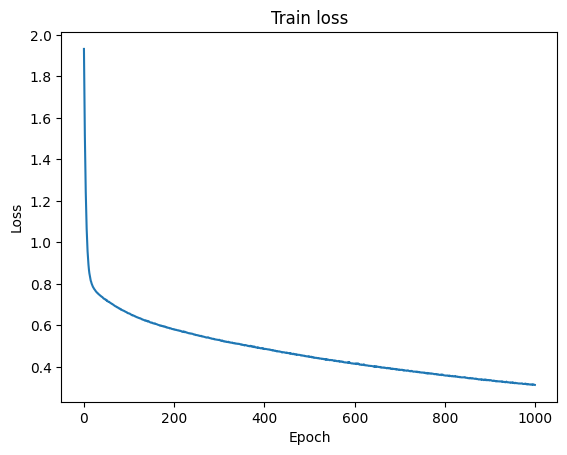

In [63]:
plot_history(history)

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

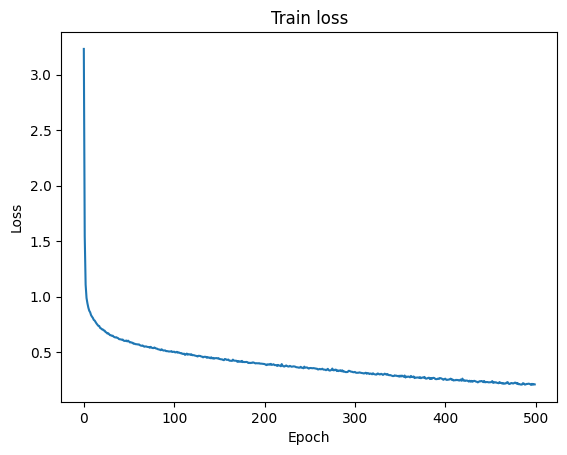

In [64]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [ ]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [ ]:
# YOUR CODE HERE

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!